In [34]:
import torch as torch
import cv2
import numpy as np
import matplotlib.cm as cm
# from kornia import make_matching_figure
import glob
import matplotlib.pyplot as plt
from featureMatcher import drawMatches



In [35]:

imagePaths = glob.glob(f'./mugOnCarpet/*.jpg')
imagePaths.sort()
print(imagePaths)

['./mugOnCarpet/PXL_20230713_184129417.jpg', './mugOnCarpet/PXL_20230713_184134651.jpg', './mugOnCarpet/PXL_20230713_184140374.jpg', './mugOnCarpet/PXL_20230713_184143425.jpg', './mugOnCarpet/PXL_20230713_184146390.jpg', './mugOnCarpet/PXL_20230713_184153119.jpg', './mugOnCarpet/PXL_20230713_184201937.jpg']


img1 to grayscale
img2 to grayscale
(640, 640) (2160, 3840)
dict_keys(['keypoints0', 'keypoints1', 'confidence', 'batch_indexes'])


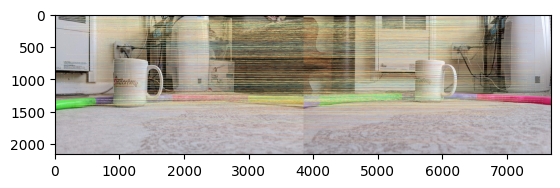

In [36]:
from featureMatcher import matchFeaturesLOFTR

img0_raw = cv2.cvtColor(cv2.imread(imagePaths[1], cv2.IMREAD_COLOR  ) , cv2.COLOR_BGR2RGB)
img1_raw = cv2.cvtColor(cv2.imread(imagePaths[2], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
img2_raw = cv2.cvtColor(cv2.imread(imagePaths[3], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

kpts1, kpts2, confidences = matchFeaturesLOFTR(img0_raw, img1_raw, pretrainedName='outdoor')

imgMatch = drawMatches(img0_raw, img1_raw,kpts1, kpts2, confidences)
plt.imshow(imgMatch)


In [39]:
# camera pose was found with calibrateImages.ipynb
cameraMatrix = np.array([[2.97384044e+04,0.00000000e+00,1.89308933e+03],[0.00000000e+00,1.81710472e+04,1.04116416e+03], [0.00000000e+00,0.00000000e+00,1.00000000e+00]])
# cameraMatrix = np.eye(3)
[E, mask] = cv2.findEssentialMat(points1=kpts1, points2=kpts2,cameraMatrix=cameraMatrix, method=cv2.RANSAC)
print(E)
print(mask.sum())

[someCount, R, t, mask] = cv2.recoverPose(E, points1=kpts1, points2=kpts2, cameraMatrix=cameraMatrix)
print(mask.shape)
print('Rotation',R)
print('translation',t)
# print('mask',mask)

[[ 0.07106735 -0.65325234 -0.0113272 ]
 [-0.65364515 -0.07029923  0.26005504]
 [ 0.01497126 -0.26083553  0.00077347]]
172
(1209, 1)
Rotation [[-0.7230271  -0.09053344  0.68486168]
 [-0.09428553  0.99503091  0.03199563]
 [-0.68435521 -0.04143884 -0.7279703 ]]
translation [[-0.36900542]
 [-0.01883651]
 [ 0.92923634]]
